<a href="https://colab.research.google.com/github/OscarTMa/Regression-Project/blob/main/notebooks/Boston_House_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Analysis: Boston House Price Prediction

## Objective
The goal of this project is to predict housing prices in the Boston area using a dataset of housing features. We will explore the data, preprocess it, and build regression models to predict prices accurately.

## Steps Covered
1. Load and explore the dataset.
2. Perform exploratory data analysis (EDA).
3. Preprocess the data for modeling.
4. Train and evaluate regression models.
5. Visualize and interpret results.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
# Use kagglehub to download and locate dataset
import kagglehub
path = kagglehub.dataset_download("fedesoriano/the-boston-houseprice-data")
print("Path to dataset files:", path)

# Load CSV into a DataFrame
data = pd.read_csv(f"{path}/boston.csv")
data.head()

Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/the-boston-houseprice-data/versions/1


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Exploratory Data Analysis (EDA)

In [4]:
# Basic information about the dataset
data.info()

# Statistical summary
data.describe()

# Check for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


### Data Visualizations

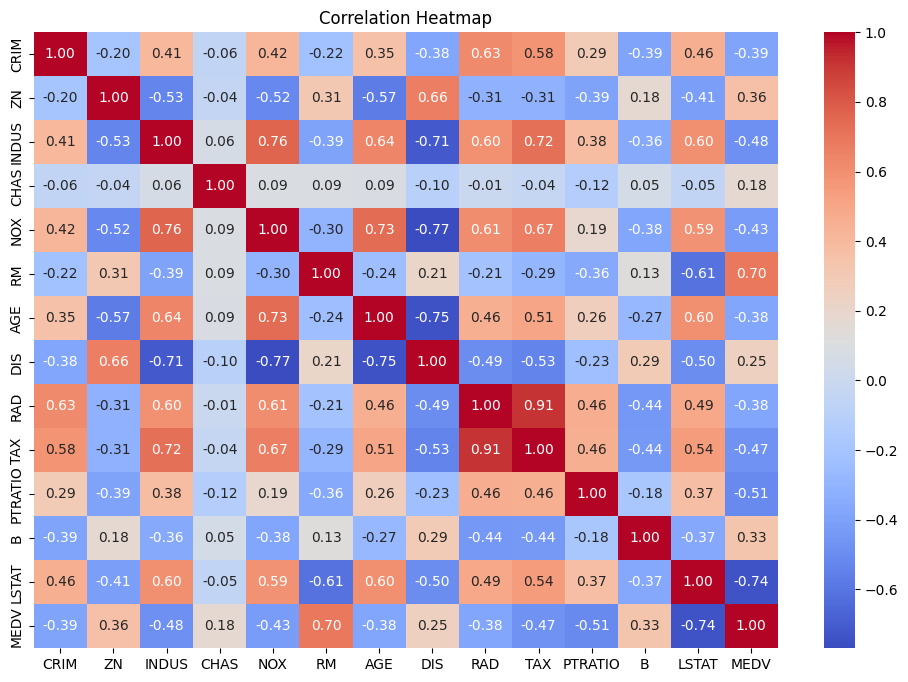

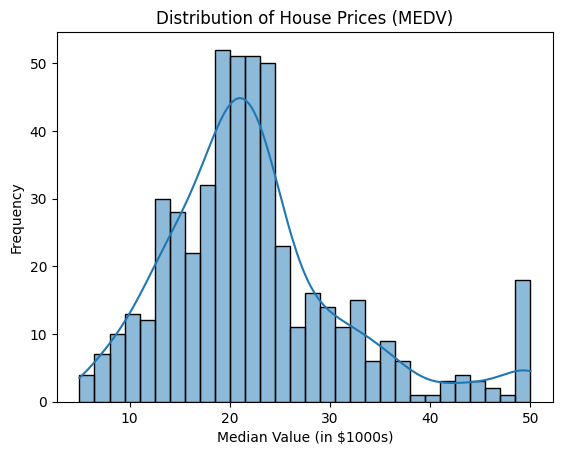

In [5]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Distribution of the target variable (MEDV - Median value of owner-occupied homes)
sns.histplot(data['MEDV'], kde=True, bins=30)
plt.title("Distribution of House Prices (MEDV)")
plt.xlabel("Median Value (in $1000s)")
plt.ylabel("Frequency")
plt.show()

## Data Preprocessing

In [6]:
# Separate features (X) and target (y)
X = data.drop(columns=["MEDV"])
y = data["MEDV"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Regression Modeling

In [7]:
# Train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

### Model Evaluation

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 24.29
Root Mean Squared Error (RMSE): 4.93
R-squared (R²): 0.67


## Conclusion
- The model's performance is evaluated using RMSE and R².
- Further steps could include trying different regression algorithms, feature engineering, and hyperparameter tuning.

## Save the model

In [9]:
import joblib

# Guardar el modelo entrenado
joblib.dump(model, "regression_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully.")


Model and scaler saved successfully.
